<a href="https://colab.research.google.com/github/Nongbon/Stat-Learning-for-Data-Sci/blob/main/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time Series Decomposition Method

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/Nongbon/Stat-Learning-for-Data-Sci/main/Data/AusBeer.csv
!wget https://raw.githubusercontent.com/Nongbon/Stat-Learning-for-Data-Sci/main/Data/GiftShop_sale.csv
!wget https://raw.githubusercontent.com/Nongbon/Stat-Learning-for-Data-Sci/main/Data/elecequip.csv
!wget https://raw.githubusercontent.com/Nongbon/Stat-Learning-for-Data-Sci/main/Data/AirPassengers.csv

--2021-06-14 18:47:45--  https://raw.githubusercontent.com/Nongbon/Stat-Learning-for-Data-Sci/main/Data/AusBeer.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3628 (3.5K) [text/plain]
Saving to: ‘AusBeer.csv’

AusBeer.csv         100%[===================>]   3.54K  --.-KB/s    in 0s      

2021-06-14 18:47:46 (61.9 MB/s) - ‘AusBeer.csv’ saved [3628/3628]

--2021-06-14 18:47:46--  https://raw.githubusercontent.com/Nongbon/Stat-Learning-for-Data-Sci/main/Data/GiftShop_sale.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 209

เฉลยแบบฝึกหัดในห้อง ข้อมูลยอดขายของร้านขาย Gift Shop แห่งหนึ่ง 

In [3]:
#load dataset
sale_data = pd.read_csv('GiftShop_sale.csv', index_col='Time')
#combine column name
sale_data['date'] = sale_data['Year'].map(str)+' '+sale_data['Quarter'].map(str)
sale_data.head()
#plt.plot(sale_data.index,sale_data.Sale)

#Classical Decomposition Method
from statsmodels.tsa.seasonal import seasonal_decompose
s = seasonal_decompose(sale_data['Sale'],
                       model='additive',freq=3)
#Show answer of 3-MA
#print(s.trend)

#Show answer of seasonal value
#print(s.seasonal)

#show answer of remainder component
#print(s.resid)

df_result = pd.concat([sale_data.date, sale_data.Sale, s.trend, s.seasonal,s.resid], axis=1)
df_result.columns = ['Period', 'actual_values','trend', 'seasonal', 'remainder']
print(df_result)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


      Period  actual_values        trend    seasonal  remainder
Time                                                           
1     2017 1           1856          NaN  326.055556        NaN
2     2017 2           2012  1617.666667  421.888889 -27.555556
3     2017 3            985  1664.000000 -747.944444  68.944444
4     2018 1           1995  1716.000000  326.055556 -47.055556
5     2018 2           2168  1745.000000  421.888889   1.111111
6     2018 3           1072  1827.000000 -747.944444  -7.055556
7     2019 1           2241  1873.000000  326.055556  41.944444
8     2019 2           2306  1884.000000  421.888889   0.111111
9     2019 3           1105  1897.000000 -747.944444 -44.055556
10    2020 1           2280  1931.000000  326.055556  22.944444
11    2020 2           2408  1936.000000  421.888889  50.111111
12    2020 3           1120          NaN -747.944444        NaN


In [ ]:
#forecasting
from scipy import stats
# StatsModels
import statsmodels.formula.api as smf

Y= sale_data.Sale-s.seasonal
sale_data.reset_index(inplace=True)
new_data = pd.DataFrame(Y, sale_data.Time)
new_data.reset_index(inplace=True)
new_data.head()

,Time,Sale
0,1,1529.944444
1,2,1590.111111
2,3,1732.944444
3,4,1668.944444
4,5,1746.111111


In [ ]:
model = smf.ols('Sale ~ Time', new_data)
results = model.fit()
print('regression coefficient:\n',results.params)
Time= np.array([13,14,15])
Seasonal = np.array([326.05, 421.89, -747.94])
y_pred= (results.params[0]+(results.params[1]*Time))+Seasonal
print('Prediction for 2021:\n',y_pred)

regression coefficient:
 Intercept    1562.530303
Time           35.867133
dtype: float64
Prediction for 2021:
 [2354.8530303  2486.56016317 1352.59729604]


Example1: Australia Beer Production (Quarterly) - Using Additive Decomposition

In [ ]:
#load dataset
beer_data = pd.read_csv('AusBeer.csv',
                        index_col='Time')
beer_data['date'] = beer_data['Year'].map(str)+' '+beer_data['Quarter'].map(str)
beer_data.head()
beer_data.info()

In [ ]:
#plot time series
plt.figure(figsize=(16,5), dpi=100)
plt.plot(beer_data.index,beer_data.Production)

Time
1            NaN
2            NaN
3       0.255776
4     -15.269687
5       2.493984
         ...    
214    10.519927
215    17.630776
216    -7.644687
217          NaN
218          NaN
Name: Production, Length: 218, dtype: float64


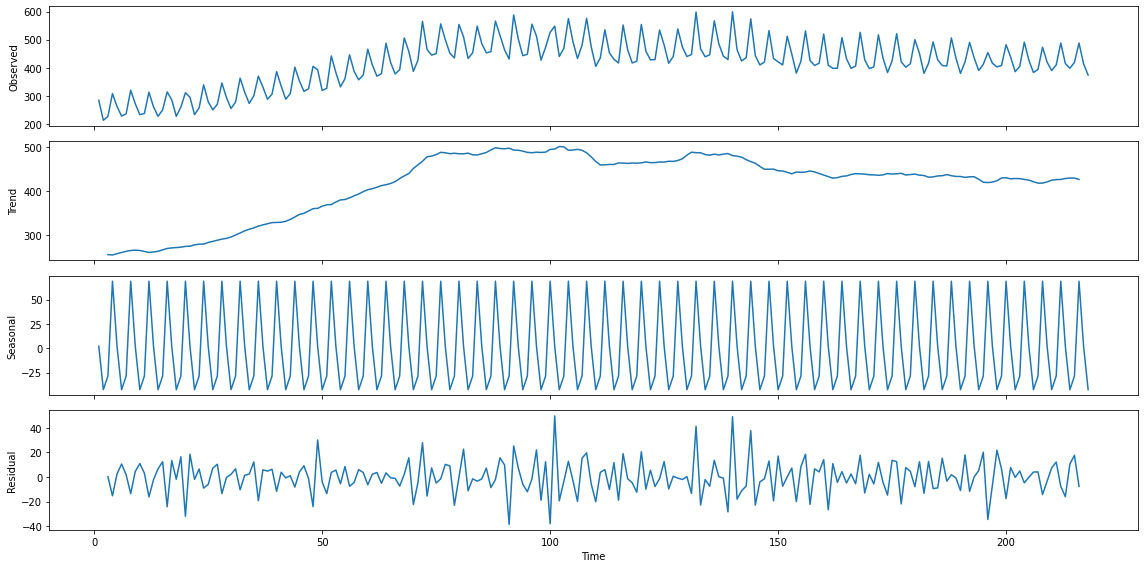

In [ ]:
#Classical Decomposition Method
from statsmodels.tsa.seasonal import seasonal_decompose
result1 = seasonal_decompose(beer_data['Production'],
                       model='additive',freq=4)
#print(result1.seasonal)
#print(result1.trend)
print(result1.resid)
plt.rcParams['figure.figsize'] = (16, 8)
x = result1.plot()

Example 2: Monthly Elecrical Equipment Manufacturing (using Multiplicative Decomposition) 

In [ ]:
#load dataset
electric_data = pd.read_csv('elecequip.csv', index_col='Time', header=0, names = ['Time','Month','Value'])
electric_data.head()

,Month,Value
Time,,
1,1996-01,79.35
2,1996-02,75.78
3,1996-03,86.32
4,1996-04,72.60
5,1996-05,74.86


Time
1      0.939426
2      0.935982
3      1.082441
4      0.934604
5      0.950348
         ...   
191    1.040990
192    1.119126
193    0.939426
194    0.935982
195    1.082441
Name: Value, Length: 195, dtype: float64


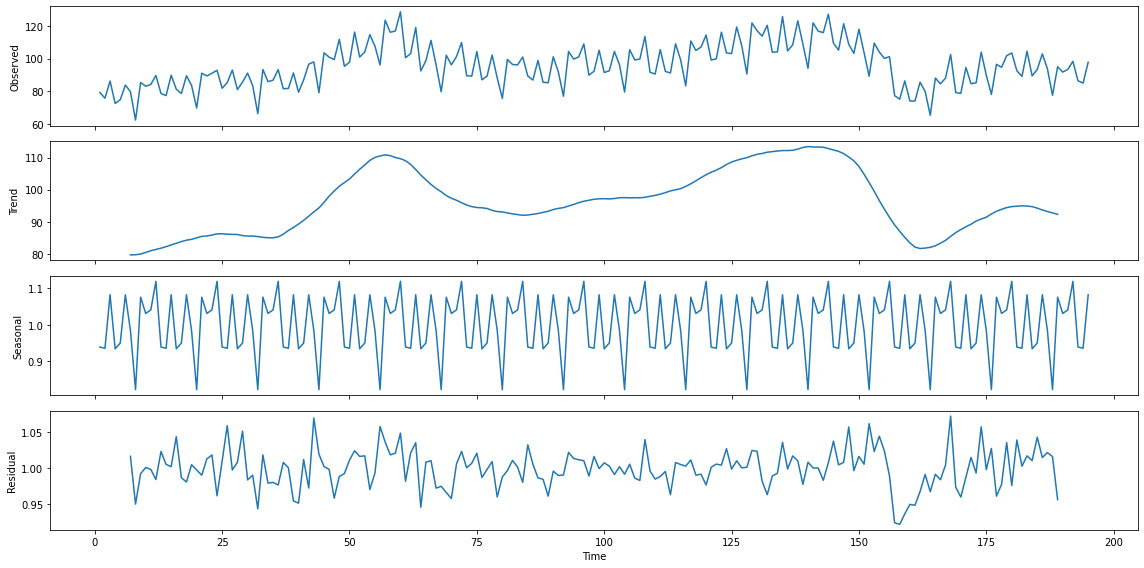

In [ ]:
#Classical Decomposition Method
from statsmodels.tsa.seasonal import seasonal_decompose
result2 = seasonal_decompose(electric_data['Value'],
                       model='multiplicative',freq=12)
print(result2.seasonal)
plt.rcParams['figure.figsize'] = (16, 8)
plot2= result2.plot()

Assignment: The AirPassengers data is a collection of monthly airline passenger numbers between 1949 – 1960. Please extract Seasonal, Trend, Remainder component using Additive Decomposition method and visualize all components.

In [ ]:
#Type your code here